In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Conv1D, MaxPooling1D
from keras.datasets import imdb


Using TensorFlow backend.


In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
seed = 0
np.random.seed(seed)
tf.random.set_seed(0)

In [5]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=500)

17465344/17464789 [==============================] - 1s 0us/step


In [6]:
x_train = sequence.pad_sequences(x_train, maxlen=100)
x_test = sequence.pad_sequences(x_test, maxlen=100)

In [7]:
model = Sequential()
model.add(Embedding(5000, 100))
model.add(Dropout(0.5))
model.add(Conv1D(64, 5, padding='valid', activation ='relu', strides=1))
model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 100)         500000    
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 100)         0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 64)          32064     
_________________________________________________________________
lstm_1 (LSTM)                (None, 55)                26400     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 56        
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total params: 558,520
Trainable params: 558,520
Non-trainable params: 0
________________________________________________

In [8]:
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [9]:
history=model.fit(x_train, y_train, batch_size = 100, epochs=5, validation_data=(x_test, y_test))

/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 39s 2ms/step - loss: 0.5349 - accuracy: 0.7133 - val_loss: 0.4325 - val_accuracy: 0.7999
Epoch 2/5
25000/25000 [==============================] - 39s 2ms/step - loss: 0.4280 - accuracy: 0.8016 - val_loss: 0.4076 - val_accuracy: 0.8132
Epoch 3/5
25000/25000 [==============================] - 39s 2ms/step - loss: 0.4128 - accuracy: 0.8107 - val_loss: 0.4200 - val_accuracy: 0.8056
Epoch 4/5
25000/25000 [==============================] - 38s 2ms/step - loss: 0.3953 - accuracy: 0.8214 - val_loss: 0.3999 - val_accuracy: 0.8200
Epoch 5/5
25000/25000 [==============================] - 38s 2ms/step - loss: 0.3873 - accuracy: 0.8212 - val_loss: 0.3876 - val_accuracy: 0.8201


In [10]:
print("\n Test Accuracy: %.4f"% (model.evaluate(x_test, y_test)[1]))

25000/25000 [==============================] - 13s 509us/step

 Test Accuracy: 0.8201


In [11]:
y_vloss=history.history['val_loss']
y_loss=history.history['loss']

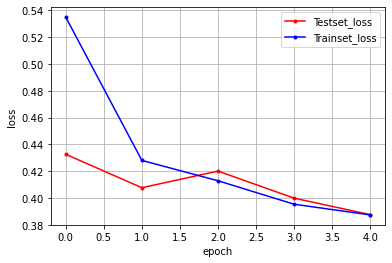

In [12]:
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label = 'Testset_loss')
plt.plot(x_len, y_loss, marker = '.', c="blue", label = 'Trainset_loss' )

plt.legend(loc = 'upper right' )
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()